<a href="https://colab.research.google.com/github/AldoEHF14/SciKitLearn-Machine-Learning/blob/main/Regresion_Lineal_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Multiple
## ¿Que es la regresion Lineal multiple?

La regresión lineal múltiple es un modelo estadístico y de machine learning que se utiliza para predecir un valor numérico (llamado variable dependiente) a partir de dos o más variables independientes.

## ¿Para qué se utiliza?
La regresión lineal múltiple se usa para:

- Predecir un resultado (ventas, likes, ingresos, etc.) usando múltiples factores.

- Analizar qué variables influyen más en el resultado.

- Modelar relaciones entre muchas variables numéricas.

El siguiente ejemplo es un modelo que está utilizando una Regresión Lineal Múltiple, que permite predecir un valor numérico (en este caso, la cantidad de "likes") usando múltiples variables numéricas como entrada.


## Ejemplo:

Estámos trabajando con un conjunto de datos llamado dataset_Facebook.csv, que contiene información sobre publicaciones hechas en una página de Facebook. Cada fila representa una publicación, y se registran diferentes métricas sobre esa publicación, como:

- Cuántos "likes" recibió,

- En qué día de la semana se publicó (lunes, martes, etc.),

- A qué hora del día se publicó,

- Cuántas interacciones totales tuvo (likes, comentarios, shares, etc.).

El objetivo principal es predecir cuántos “likes” tendrá una publicación, usando como variables independientes:

 - La hora en que se publica la publicación (Post Hour),

- El día de la semana (Post Weekday),

- El número de interacciones totales (Total Interactions).


Pagina de Sciki-learn:
[Sciki-learn](https://scikit-learn.org/stable/)

Base de datos del articulo de Facebook:
[Dataset](https://drive.google.com/file/d/1Pq-dla1M6tmykLPi-zkoL6Bpd0W7dCgC/view)


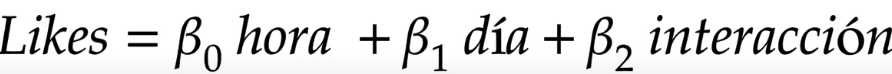

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
#Leer archivo desde el escritorio (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving dataset_Facebook.csv to dataset_Facebook.csv


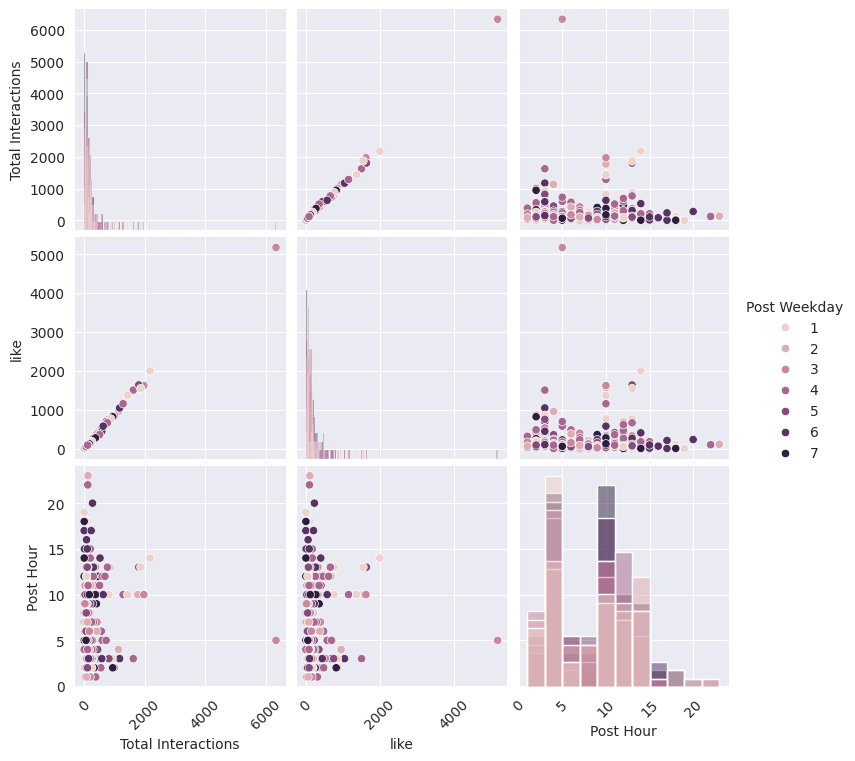

In [19]:
sns.set_style("darkgrid" ) # Estilo
datos = pd.read_csv("dataset_Facebook.csv") # Leer el conjunto de datos
nuevo = datos[['Total Interactions','Post Weekday','like','Post Hour']]

g=sns.pairplot(nuevo,hue="Post Weekday",diag_kind="hist")

# For para que las graficas se puedan visualizar mejor
for ax in g.axes.flat:
  plt.setp(ax.get_xticklabels(),rotation=45)

# Caracter que no se reconoce
datos = datos.replace(np.nan,"0")
share = datos['share'].values
hour = datos["Post Hour"].values
days = datos['Post Weekday']
likes =  datos['like'].values
interaction = datos['Total Interactions'].values

# Generar el arreglo para X
X = np.array([hour,days,interaction]).T
Y = np.array(likes)


In [20]:
#Crear y entrenar el modelo
reg = LinearRegression()
reg=reg.fit(X,Y)

# Predecir sobre el mismo conjunto
y_pred = reg.predict(X)

# Evaluacion del modelo
error=np.sqrt(mean_squared_error(Y,y_pred))
r2=reg.score(X,Y)

# Imprimir resultados
print("El error (RMSE) es:", error)
print("El valor de R² es:", r2)
print("Coeficientes del modelo:", reg.coef_)
print("Intercepto:", reg.intercept_)


El error (RMSE) es: 21.81953867915252
El valor de R² es: 0.9954323615919498
Coeficientes del modelo: [ 0.21551007 -0.40017767  0.84787796]
Intercepto: -2.290734464860691


In [21]:
# Predicción en un punto específico
# Por ejemplo: Hora=17, Día=1 (Lunes), Interacción=150
hour = 17
days = 1
interaction = 150
prediccion = reg.predict([[hour, days, interaction]])
print("Predicción de 'likes' para [hora=17, día=q, interacciones=150]:", prediccion[0])

Predicción de 'likes' para [hora=17, día=q, interacciones=150]: 128.1544530376441
